In [22]:
# Hedging the option.


In [25]:
import math as mt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot

class anoption:
    def __init__(self,T,K,sigma,r,call=True):
        self.T = T
        self.K = K
        self.call = call
        self.sigma = sigma
        self.r = r
    def price(self,t,S):
        tau = self.T.toordinal()-t.toordinal()
        tau = tau/365.0
        sigma = self.sigma
        r = self.r
        K = self.K
        ss = sigma*mt.sqrt(tau)
        d1 = 1/ss*(mt.log(S/K)+(r+sigma**2/2)*tau)
        d2 = d1 - ss
        self.d1 = d1
        self.d2 = d2
        PVK = K*mt.exp(-r*tau)
        if self.call:
            delta = st.norm.cdf(d1)
            self.delta = delta
            prob1 = delta
            prob2 = st.norm.cdf(d2)
            val2ret = prob1*S - prob2*PVK
        else:
            delta = st.norm.cdf(-d1)
            self.delta = -delta
            prob1 = st.norm.cdf(-d2)
            prob2 = delta
            val2ret = prob1*PVK - prob2*S 
        self.value = val2ret
        return val2ret
        
class underlying:
    def __init__(self,S0,t0,mu,sigma):
        self.S0 = S0
        self.t0 = t0
        self.mu = mu
        self.sigma = sigma
    def getret(self):
        ret = np.random.normal(self.mu/365,self.sigma/mt.sqrt(365),1)
        return float(ret)
    
class anaccount:
    def __init__(self,r,und,opt,n_options,sfee,cash0):
        self.r = r
        self.und = und
        self.opt = opt
        self.n_options = n_options
        self.fee_rate = sfee
        self.cash = cash0
        self.records = pd.DataFrame(columns=['Stk Prc','Opt Prc','Stk N','Opt N','Stk Pos','Opt Pos','Cash no hedge','Total no hedge','Cash','Total'])
        self.addrecord()
    def addrecord(self): 
        nr, nc = np.shape(self.records)
        if nr == 0: 
            newdate = self.und.t0
            newprce = self.und.S0
        else:
            vakar = self.records.iloc[-1,]
            yesterday = vakar.name
            newdate = pd.Timestamp(1989,6,24)
            newdate = newdate.fromordinal(yesterday.toordinal()+1)
            yesterday_price = vakar['Stk Prc']
            newprce = yesterday_price*(1+self.und.getret())
        optval = self.opt.price(newdate,newprce)
        optN = self.n_options
        stkN = -self.opt.delta*optN
        optpos = optN*optval
        stkpos = stkN*newprce
        if nr == 0:
            self.cash_nh = self.cash - optpos
            self.cash = self.cash_nh - stkpos
            if optpos < 0:
                thefee = -optpos*self.fee_rate
                self.cash = self.cash + thefee
                self.cash_nh = self.cash_nh+thefee
                self.price_to_quote = -optpos+thefee
        else:
            yesterday_stkN = vakar['Stk N']
            stk2buy = (stkN - yesterday_stkN)*newprce
            self.cash = self.cash - stk2buy
        total = optpos+stkpos+self.cash
        total_nh = optpos+self.cash_nh
        newrow = pd.Series(
            {'Stk Prc':newprce,
             'Opt Prc':optval,
             'Stk N':stkN,
             'Opt N':optN,
             'Stk Pos':stkpos,
             'Opt Pos':optpos,
             'Cash':self.cash,
             'Total':total,
             'Cash no hedge':self.cash_nh,
             'Total no hedge':total_nh},name = newdate)
        self.records = self.records.append(newrow)
        

,Stk Prc,Opt Prc,Stk N,Opt N,Stk Pos,Opt Pos,Cash no hedge,Total no hedge,Cash,Total
2019-05-27,50.000000,2.996684,-0.462546,-1.0,-23.127287,-2.996684,103.296352,100.299668,126.423639,100.299668
2019-05-28,50.326445,2.833140,-0.445891,-1.0,-22.440085,-2.833140,103.296352,100.463212,125.585442,100.312216
2019-05-29,50.044942,2.945366,-0.460593,-1.0,-23.050368,-2.945366,103.296352,100.350986,126.321244,100.325510
2019-05-30,50.138554,2.887041,-0.455881,-1.0,-22.857233,-2.887041,103.296352,100.409311,126.084991,100.340718
2019-05-31,50.914822,2.533174,-0.415889,-1.0,-21.174895,-2.533174,103.296352,100.763178,124.048767,100.340698
2019-06-01,51.323205,2.351943,-0.395153,-1.0,-20.280519,-2.351943,103.296352,100.944409,122.984549,100.352088
2019-06-02,51.494771,2.269227,-0.386376,-1.0,-19.896336,-2.269227,103.296352,101.027125,122.532572,100.367009
2019-06-03,51.530072,2.239882,-0.384377,-1.0,-19.806995,-2.239882,103.296352,101.056470,122.429591,100.382715
2019-06-04,51.723563,2.150668,-0.374450,-1.0,-19.367891,-2.150668,103.296352,101.145684,121.916113,100.397555
2019-06-05,52.858581,1.741569,-0.319499,-1.0,-16.888290,-1.741569,103.296352,101.554782,119.011505,100.381646


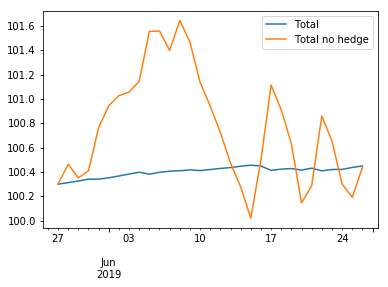

In [27]:
r = 0.01
sigma = 0.3
K = 50
T = pd.Timestamp(2019,8,31)
put1 = anoption(T,K,sigma,r,False)
today = pd.Timestamp(2019,5,27)
stk1 = underlying(50,today,0.1,0.3)
acc1 = anaccount(0.01,stk1,put1,-1,0.1,100)

for i in range(30): acc1.addrecord()

data2plot = acc1.records[['Total','Total no hedge']]
data2plot.plot()

acc1.records

In [16]:
# Scratch work

<h3> Scratch work </h3>

In [14]:
l = [11,12,13,14,15,16,17]

In [15]:
l[0]

11

In [16]:
d = {'one':'vienas','two':'du','three':'trys'}

In [17]:
type(d)

dict

In [21]:
d['one']

'vienas'

In [19]:
d.keys()

dict_keys(['one', 'two', 'three'])

In [20]:
d.values()

dict_values(['vienas', 'du', 'trys'])

In [6]:
acc1.records[['Total','Total no hedge']]

,Total,Total no hedge
2019-05-27,100.029967,100.029967
2019-05-28,100.034646,100.332568
2019-05-29,100.041723,100.095198
2019-05-30,100.043090,100.436088
2019-05-31,100.058197,100.394472
2019-06-01,100.047066,100.822567
2019-06-02,100.060319,100.950242
2019-06-03,100.075777,100.989760
2019-06-04,100.091172,101.039185
2019-06-05,100.093503,101.302190
